# Classification

## MNIST

This chapter uses the MNIST dataset, containing 70,000 small images of handwritten digits labeled with their corresponding numbers. Created by high school students and US Census Bureau employees, MNIST is so widely studied that it's considered Machine Learning's "hello world." Researchers test new classification algorithms on it, and it's a fundamental dataset for ML learners. Scikit-Learn includes helper functions to download MNIST and other popular datasets, as shown in the provided code.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

- importing libs again

In [5]:
from sklearn.datasets import fetch_openml

In [10]:
mnist = fetch_openml(name='mnist_784', version=1, parser='auto')
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

- The `parser='auto'` command was added due to a warning about a future change in scikit-learn's `fetch_openml()` function.

Datasets loaded by Scikit-Learn generally have a similar dictionary structure, includ‐
ing the following:
- A DESCR key describing the dataset
- A data key containing an array with one row per instance and one column per feature
- A target key containing an array with the labels

Let’s look at these arrays:

In [11]:
X, y = mnist["data"], mnist["target"]

In [12]:
X.shape

(70000, 784)

In [13]:
y.shape

(70000,)

There are 70,000 images, and each image has 784 features. This is because each image is 28×28 pixels, and each feature represents one pixel's intensity, ranging from 0 (white) to 255 (black). Let’s look at one digit from the dataset: grab an instance’s feature vector, reshape it to a 28×28 array, and display it using Matplotlib’s `imshow()` function.

In [21]:
import matplotlib as mpl

In [24]:
some_digit = X.iloc[0].values  # Get first row as NumPy array
some_digit_image = some_digit.reshape(28, 28)  # Now reshape works

- The book doesn't convert the data to a NumPy array, but converting it first is necessary. I don’t fully understand why the book didn’t do this...

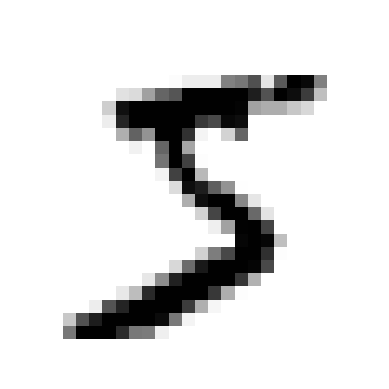

In [25]:
plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

- This looks like a 5 (kinda), and indeed that’s what the label tells us:

In [26]:
y[0]

'5'

- Always create a test set and set it aside before inspecting the data closely. The MNIST dataset is actually already split into a training set (the first 60,000 images) and a test set (the last 10,000 images)

In [27]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

The training set is already shuffled for us, which is good because this guarantees that all cross-validation folds will be similar (you don’t want one fold to be missing some digits). Moreover, some learning algorithms are sensitive to the order of the training instances, and they perform poorly if they get many similar instances in a row. Shuf‐fling the dataset ensures that this won’t happen.